In [1]:
from neuron import h
from Cereb_GrC_regular import Grc_regular
import multiprocessing
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subtype = "adapting"
cell = Grc_regular(3, subtype)
time_step = h.CVode()
time_step.active(0) #0 fixed step, 1 variable time step


103 lines read


False

In [3]:
cpu = multiprocessing.cpu_count() // 2
h.load_file("parcom.hoc")
p = h.ParallelComputeTool()
if cpu > 8:
    p.change_nthread(8,1)
    print('Maximum 8 threads')
else:
    p.change_nthread(cpu,1)    
    print('N° of treads', cpu)
p.multisplit(1)

N° of treads 8


0.0

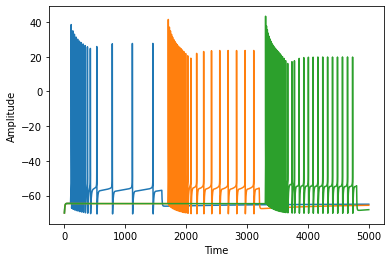

In [4]:
h.dt = 0.025
h.celsius = 32
h.tstop = 5000
h.v_init = -70

stimdata = [
    [100, 1500, 0.01],  # delay, duration, amplitude
    [1700, 1500, 0.016],
    [3300, 1500, 0.022],
]

for i, (delay, duration, amplitude) in enumerate(stimdata):
    stim = [h.IClamp(0.5, sec=cell.soma[0])]
    stim[0].delay = delay
    stim[0].dur = duration
    stim[0].amp = amplitude

    def initialize():
        h.finitialize()
        h.run()
    
    initialize()

    img = plt.plot(np.array(cell.time_vector), np.array(cell.vm_soma))
    plt.xlabel("Time")
    plt.ylabel("Amplitude")